In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
# import some data to play with
xls = pd.ExcelFile('/content/heart_disease.xlsx')
heart = pd.read_excel(xls, 'Heart_disease')

In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
print(type(heart))
heart.shape

<class 'pandas.core.frame.DataFrame'>


(908, 13)

In [ ]:
(heart==0).all()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalch      False
exang       False
oldpeak     False
slope       False
thal        False
num         False
dtype: bool

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    bool   
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(2), float64(1), int64(5), object(5)
memory usage: 79.9+ KB


In [63]:
mean=heart['oldpeak'].mean()

In [ ]:
#Count of duplicated rows
heart[heart.duplicated()].shape

(0, 13)

In [ ]:
heart.cp.unique()

array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)

In [ ]:
heart.restecg.unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [ ]:
heart.slope.unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

In [ ]:
heart.thal.unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

In [ ]:
heart.exang.unique()

array([False,  True])

In [ ]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
heart['sex']= label_encoder.fit_transform(heart['sex'])

In [ ]:
heart['cp']= label_encoder.fit_transform(heart['cp'])

In [ ]:
heart['fbs']= label_encoder.fit_transform(heart['fbs'])

In [ ]:
heart['restecg']= label_encoder.fit_transform(heart['restecg'])

In [ ]:
heart['exang']= label_encoder.fit_transform(heart['exang'])

In [ ]:
heart['slope']= label_encoder.fit_transform(heart['slope'])

In [ ]:
heart['thal']= label_encoder.fit_transform(heart['thal'])

In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


In [69]:
#Mean Imputation
mean = heart['oldpeak'].mean()
print(mean)

0.8912529550827422


In [70]:
heart['oldpeak'] = heart['oldpeak'].fillna(mean)

In [71]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    int64  
 2   cp        908 non-null    int64  
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    int64  
 6   restecg   908 non-null    int64  
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    int64  
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    int64  
 11  thal      908 non-null    int64  
 12  num       908 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 92.3 KB


In [73]:
#Independent variable
x=heart.iloc[:,0:12]
#dependent variable
y=heart['num']

In [74]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0,2.300000,0,0
1,41,1,1,135,203,0,1,132,0,0.000000,1,0
2,57,1,0,140,192,0,1,148,0,0.400000,1,0
3,52,1,3,118,186,0,0,190,0,0.000000,1,0
4,57,1,0,110,201,0,1,126,1,1.500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.500000,2,2
904,62,1,0,166,170,0,2,120,1,3.000000,1,0
905,56,1,2,170,0,0,0,123,1,2.500000,0,1
906,56,1,2,144,208,1,2,105,1,0.891253,0,0


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

In [58]:
#to know unique values for label encoding
heart['num'].unique()

array([0, 1, 2, 3, 4])

In [59]:
heart.num.value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [60]:
colnames = list(heart.columns)
colnames

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'num']

In [78]:
# Splitting data into training and testing data set
# test size 80:20 then 0.2 or 70:30 then 0.3-split proportion
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)

In [83]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

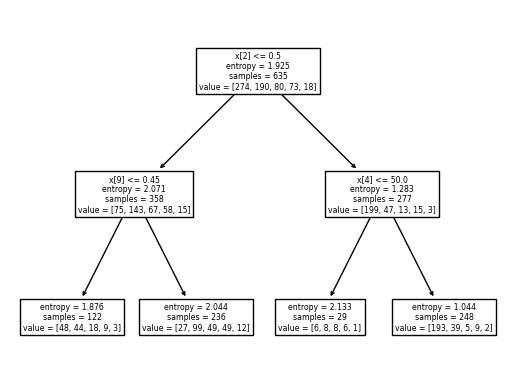

In [84]:
#PLot the decision tree
tree.plot_tree(model);
#lower the entropy good the split

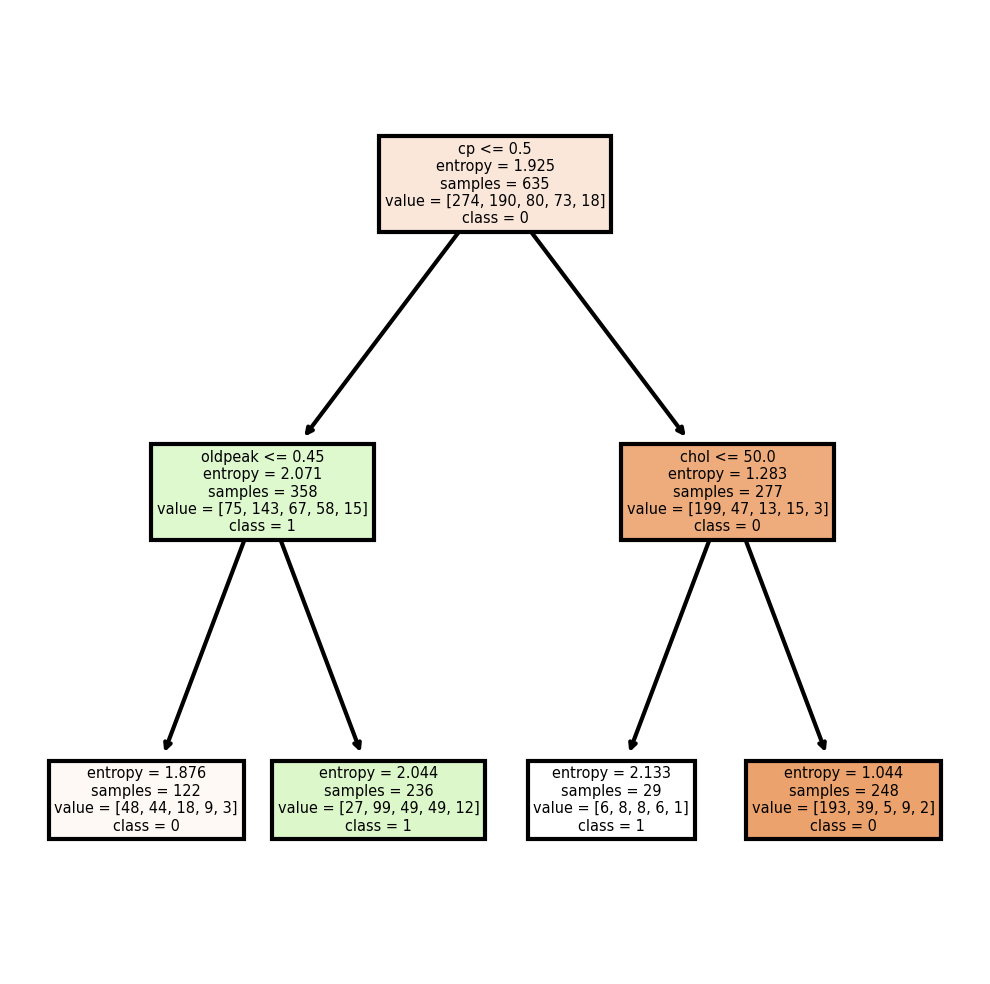

In [86]:
#feature name-fn,class names-cn
#for better visualization
fn=['age','sex','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','thal','num']
cn=['0', '1','2','3','4']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [87]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

0    160
1    113
Name: count, dtype: int64

In [88]:
preds

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0])

In [89]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
num,,
0,103,22
1,33,42
2,10,19
3,12,22
4,2,8


In [90]:
# Accuracy
np.mean(preds==y_test)

0.5311355311355311

# **Gini criteria**

In [91]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [92]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [93]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5311355311355311

**Regression Model:**

In [94]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [96]:
array = heart.values
X = array[:,0:12]
y = array[:,12]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [104]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

**Interview Questions:**

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Ans:Some common Hyperparameters of decision tree are min_samples_leaf , min_samples_split , max_leaf_nodes , or min_impurity_decrease which effects the decision tree by allowing asymmetric trees and apply a constraint at the leaves or nodes level.

2. What is the difference between the Label encoding and One-hot encoding?

Ans:These two are useful for to convert categorical data into a format that computers can work with.Label Encoding is suitable when there is an intrinsic order in the categories, whereas One-Hot Encoding is better for nominal categories.